# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [623]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [624]:
import pandas as pd
import requests as r
import tweepy  
from tweepy import OAuthHandler
import json
import io
from timeit import default_timer as timer

In [625]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv') 

In [626]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [627]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = r.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(image_predictions.content)
    
image_predictions_df = pd.read_csv('image-predictions.tsv',sep="\t")

In [628]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [629]:
consumer_key = ' '
consumer_secret = '  '
access_token = '  '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [586]:
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

2356

In [126]:


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 227


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Fail
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933

Rate limit reached. Sleeping for: 216


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

In [241]:
tweets = []
for each_line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(each_line))
#print out one json object for further reference 
tweets[0] 

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [630]:
#create a list from tweet_json.txt we created earlier.
list_tweets = []
for tweet in tweets:
    list_tweets.append({'id' : tweet['id'],
                       'retweet_count': int(tweet['retweet_count']),
                       'favorite_count' : int(tweet['favorite_count'])})
   


In [631]:
# creat a Dataframe
tweets_from_api = pd.DataFrame(list_tweets, columns = ['id', 'retweet_count' , 'favorite_count']) 
#view the newly created dataframe
tweets_from_api.head() 

,id,retweet_count,favorite_count
0,892420643555336193,6975,33713
1,892177421306343426,5276,29233
2,891815181378084864,3466,21982
3,891689557279858688,7197,36808
4,891327558926688256,7721,35195


So the different columns in the  tweets_from_api means: 

    - Tweet_id (int64) uniquely identifies a tweet
    - Retweet_count (int64) number of times this Tweet has been retweeted
    - Followers_count (int64) the number of follower the tweeter has. 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [632]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [633]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [634]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [635]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [636]:
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
948,752334515931054080,NaN,NaN,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752334515...,8,10,None,doggo,None,None,None
2276,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,None,None,None
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,None,None,None,None
1653,683462770029932544,NaN,NaN,2016-01-03 01:39:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683462770...,8,10,None,None,None,pupper,None
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None,None,None,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Wild Tuscan Poofwiggle. Careful not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702539513...,12,10,a,None,None,None,None
2039,671547767500775424,NaN,NaN,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,None,None,None,None
712,784431430411685888,NaN,NaN,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,None,None,None,None


In [637]:
#Since id has to be unique I decided to check if theres any redundancy in this columns
twitter_archive_enhanced.duplicated('in_reply_to_status_id').sum()

2278

In [638]:
twitter_archive_enhanced.duplicated('tweet_id').sum()

0

In [639]:
twitter_archive_enhanced.duplicated('in_reply_to_user_id').sum()

2324

In [640]:
twitter_archive_enhanced.duplicated('in_reply_to_user_id').sum()

2324

In [641]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [642]:
image_predictions_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
1650,809220051211603969,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,Pomeranian,0.819511,True,Samoyed,0.141241,True,Pembroke,0.013455,True
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle,0.858513,True,basset,0.076012,True,English_foxhound,0.016246,True
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False


In [643]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [644]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# Quality issues


1. In the name column dogs with no names were represent in two ways: ' a' and 'none.' We have 55 a and 745 none.  

2. Max denominator of 170 instead of 10. And also had different denominator instead of 10.

3. Min numerator for some observation is 0, and it should be greater than 10. 
      - tweet_id: 835152434251116546 (rating here is 0/10)
      - tweei_id: 746906459439529985 (rating here is 0/10)


4. There's redundancy in in_reply_to_user_id and in_reply_to_status_id column

5. The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp variables has a lot of missing data. Also, we don't need this for analysis

6. The timestamp datatype is a string and should be DateTime

7. Generally, there are different numbers of records in each dataset

8. Name: All names should start with a capital letter.                                                                   

### Tidiness issues
1. The columns doggo, floofer, pupper and puppo needs to be in one column since the represents a do personality.

2. We will need to merge the 3 tables at the end

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [645]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweets_from_api_clean = tweets_from_api.copy()

### Issue #1: 

The name column from twitter_archive_enhanced with no names have 2 ways to represent them, 'a' and 'none'

#### Define: 
We need to loop through the name column and when ever we find 'a' we replace it with 'none'


#### Code


In [646]:
twitter_archive_enhanced_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [647]:
wrong_representation =  list(twitter_archive_enhanced_clean.query('name == "a"').index)
for representation in wrong_representation:
    twitter_archive_enhanced_clean.name[representation] = "None"

C:\Users\Hp\AppData\Local\Temp\ipykernel_13620\1591959970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.name[representation] = "None"


#### Test

In [648]:
twitter_archive_enhanced_clean.name.value_counts()

None          800
Charlie        12
Cooper         11
Lucy           11
Oliver         11
             ... 
Aqua            1
Chase           1
Meatball        1
Rorie           1
Christoper      1
Name: name, Length: 956, dtype: int64

In [649]:
#Querying to get the values with name equal to a
wrong_representation =  list(twitter_archive_enhanced_clean.query('name == "a"').index)

### Issue #2: 

Different denominators instead of having 10.

### Define: 
The denominator of each rating is suppose to be 10, in some cases its 0 and some cases its even greater than 10. We will convert every data to 10 in the denominator and replace any outliers in the numerator with the mean. 

#### Code

In [650]:
#Checking for any value less than or greater than 10.
Check_rating_value = list(twitter_archive_enhanced_clean.query('rating_denominator != 10').index)

In [651]:
# Checking the data and finding outliers and replacing them with 10. 
for representation in Check_rating_value:
    twitter_archive_enhanced_clean.rating_denominator[representation] = 10

C:\Users\Hp\AppData\Local\Temp\ipykernel_13620\592291677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating_denominator[representation] = 10


#### Test

In [652]:
for representation in Check_rating_value :
    if twitter_archive_enhanced_clean.rating_denominator[representation] != 10:
        print("There's no such outlier")
    

In [653]:
twitter_archive_enhanced_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.0
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.0
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0


### Issue #3: 

The project expected us to have only tweets with original ratings(no retweets and no replies)

#### Define: 
- From twitter_archive_enhanced_clean remove tweets that have a reply or a retweet which is:
     - In_reply_to_status_id,
     - Retweeted_status_id,
     - In_reply_to_user_id,
     - Retweeted_status_user_id not NaN.
- Remove all colummns not needed for our analysis then:
    - In_reply_to_status_id,
    - In_reply_to_user_id,
    - Retweeted_status_id,
    - Retweeted_status_user_id,
    - Retweeted_status_timestamp.

#### Code

In [654]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [655]:
#Remove all values that are not NAN in in_reply_to_status_id
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.index.difference(twitter_archive_enhanced_clean['in_reply_to_status_id'].dropna().index)]


In [656]:
# Remove al values that are not NAN IN
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.index.difference(twitter_archive_enhanced_clean['retweeted_status_id'].dropna().index)]


In [657]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [658]:
# Remove not needed columns
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id', 
                                    'in_reply_to_user_id', 
                                    'retweeted_status_id', 
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp',
                                     'expanded_urls'], axis=1, inplace=True)

#### Test: 

In [659]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


 ### Issue #4: 
Mininum numerator for some observation is 0 and its should be greater than 10. 

### define: 


we need to get the mean and loop throup, if we find any outliers or values below 10 we will replace mean

### code: 

In [660]:
# When accessing we notice that the maximum numerator was 1776, this seem to be to high as compared to 10,
# we will check if this an outlier or most ratings are found in that range. since we were told the numerator 
# has to be grater than 10 but no limit was given.
twitter_archive_enhanced_clean.query('rating_numerator >100')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,10,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,10,this,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,121,10,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,10,None,None,None,None,None


In [661]:
#Getting the mean of the dataframe 
mean_rating = twitter_archive_enhanced_clean['rating_numerator'].mean()

Since this column is of datatype float its not possible using round function. So we will assume the mean is 13. 

In [662]:
twitter_archive_enhanced_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.097000e+03,2097.000000,2097.0
mean,7.365594e+17,12.189318,10.0
std,6.710178e+16,40.364996,0.0
min,6.660209e+17,0.000000,10.0
25%,6.768197e+17,10.000000,10.0
50%,7.098528e+17,11.000000,10.0
75%,7.877176e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [663]:
# Checking for values with rating less than 10 and replacing them mean
wrong_numerator =  list(twitter_archive_enhanced_clean.query('rating_numerator == 10 ').index)
for representation in wrong_numerator :
    twitter_archive_enhanced_clean.rating_numerator[representation] = 13

C:\Users\Hp\AppData\Local\Temp\ipykernel_13620\745612704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating_numerator[representation] = 13


## Test

In [664]:
for representation in wrong_numerator:
    if twitter_archive_enhanced_clean.rating_numerator[representation] < 10:
        print("There's an outlier")

In [665]:
twitter_archive_enhanced_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.097000e+03,2097.000000,2097.0
mean,7.365594e+17,12.813066,10.0
std,6.710178e+16,40.349515,0.0
min,6.660209e+17,0.000000,10.0
25%,6.768197e+17,11.000000,10.0
50%,7.098528e+17,12.000000,10.0
75%,7.877176e+17,13.000000,10.0
max,8.924206e+17,1776.000000,10.0


## Issue 5
To reduce redundancy by merging the columns doggo, floofer, pupper and puppo to new column called personality.

## Define
Merge the columns doggo, floofer, pupper and puppo to single column personality.

## code

In [666]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [667]:
# Merging the 4 columns
twitter_archive_enhanced_clean['personality']=None
twitter_archive_enhanced_clean['personality'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo

In [668]:
twitter_archive_enhanced_clean['personality'].value_counts()

NoneNoneNoneNone        1761
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: personality, dtype: int64

In [669]:
# Remove none in each row
twitter_archive_enhanced_clean['personality'] = twitter_archive_enhanced_clean['personality'].map(lambda x: x.replace("None",""))
twitter_archive_enhanced_clean['personality'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: personality, dtype: int64

In [670]:
# Since we know that some dogs have two stages, let's add a ", " between the two words.
# For instance, consider the "doggopupper. "Doggo, pupper" should be used instead.
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.personality == 'doggopupper', 'personality'] = 'doggo, pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.personality == 'doggopuppo', 'personality'] = 'doggo, puppo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.personality == 'doggofloofer', 'personality'] = 'doggo, floofer'

In [671]:
twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

Test

In [672]:
twitter_archive_enhanced_clean['personality'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: personality, dtype: int64

## Issue 6
All names should start with a capital letter

## Define
Change initial letter to title case.

## code

In [673]:
twitter_archive_enhanced_clean['name'] =twitter_archive_enhanced_clean['name'].str.title()

## Test

In [674]:
twitter_archive_enhanced_clean['name'].sample(10)

493       None
1893      None
695      Logan
2106       Edd
1743      None
718       Finn
1645    Jiminy
48       Rusty
282       Odie
1573      Marq
Name: name, dtype: object

## Issue 7
Consolidates the data frames today

## define
Merge the data frames using merge function on their common colums that is the ids.

## Code

In [675]:
#Consolidate the twitter_api clean dataframe and twitter_archive_enhanced_clean
twitter_archive_enhanced_merged = pd.merge(twitter_archive_enhanced_clean, tweets_from_api_clean, how='left', left_on='tweet_id', right_on='id')

In [676]:
twitter_archive_enhanced_merged.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,personality,id,retweet_count,favorite_count
925,727524757080539137,2016-05-03 15:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,13,10,None,pupper,7.275248e+17,1080.0,4102.0
92,871879754684805121,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,13,10,Lassie,,8.718798e+17,9212.0,32991.0
843,741793263812808706,2016-06-12 00:44:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your crush won't pay attention to you. Bo...,13,10,None,,7.417933e+17,1380.0,4208.0
275,831315979191906304,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,pupper,8.313160e+17,1036.0,6162.0
183,848324959059550208,2017-04-02 00:03:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Odin. He's supposed to be giving directio...,12,10,Odin,,8.483250e+17,4143.0,22786.0


In [677]:
twitter_archive_enhanced_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   personality         2097 non-null   object 
 8   id                  2088 non-null   float64
 9   retweet_count       2088 non-null   float64
 10  favorite_count      2088 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 196.6+ KB


In [678]:
#Since the id column is a repetition of the first tweet_id we will drop it 
twitter_archive_enhanced_merged.drop('id', axis=1, inplace = True)

In [679]:
# Merge the twitter_archive_enhanced_merged with image_predictions_df_clean
twitter_archive_enhanced_merged = pd.merge(twitter_archive_enhanced_merged, image_predictions_df_clean, how='left', on='tweet_id')

In [680]:
twitter_archive_enhanced_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   personality         2097 non-null   object 
 8   retweet_count       2088 non-null   float64
 9   favorite_count      2088 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_con

In [681]:
# #Drop all columns not needed
twitter_archive_enhanced_merged.drop(["p1", 'p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)


In [682]:
#So we can see that the favourite and retweet_count is missing some values, so we will drop those columns
twitter_archive_enhanced_merged.dropna(subset = ['retweet_count', 'favorite_count'], inplace=True )

In [683]:
# Also we only want original ratings (no retweets) that have images. 
twitter_archive_enhanced_merged.dropna(subset = ['jpg_url', 'img_num'], inplace=True )

### Test

In [684]:
twitter_archive_enhanced_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   int64  
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   rating_numerator    1962 non-null   int64  
 5   rating_denominator  1962 non-null   int64  
 6   name                1962 non-null   object 
 7   personality         1962 non-null   object 
 8   retweet_count       1962 non-null   float64
 9   favorite_count      1962 non-null   float64
 10  jpg_url             1962 non-null   object 
 11  img_num             1962 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 199.3+ KB


### Issue 8
Changing the datatype of timestamp

### define
Changing the datatype of timestamp using to_datetime

### Code

In [685]:

twitter_archive_enhanced_merged.timestamp = pd.to_datetime(twitter_archive_enhanced_merged.timestamp) 

### Test

In [686]:
twitter_archive_enhanced_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   int64              
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   source              1962 non-null   object             
 3   text                1962 non-null   object             
 4   rating_numerator    1962 non-null   int64              
 5   rating_denominator  1962 non-null   int64              
 6   name                1962 non-null   object             
 7   personality         1962 non-null   object             
 8   retweet_count       1962 non-null   float64            
 9   favorite_count      1962 non-null   float64            
 10  jpg_url             1962 non-null   object             
 11  img_num             1962 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [687]:
twitter_archive_enhanced_merged.to_csv('twitter_archive_master.csv' , index=False)

In [688]:
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Relationship between retweet count and favourite count

2. What are most common 10 dogs' names?

3. Distribuion of the different Sources from which the tweets were made. 

4. The most common dog personality

#### Insights 1: Relationship between retweet count and favourite count.

In [689]:
df.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,personality,retweet_count,favorite_count,jpg_url,img_num
939,712438159032893441,2016-03-23 00:37:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kane. He's a semi-submerged Haitian Hu...,11,10,Kane,NaN,1416.0,4900.0,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1.0
989,708026248782585858,2016-03-10 20:26:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch thi...,13,10,None,NaN,1748.0,4062.0,https://pbs.twimg.com/ext_tw_video_thumb/70802...,1.0
1048,702932127499816960,2016-02-25 19:04:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's an Upper West Nile Pantaloo...,6,10,Chip,NaN,650.0,2367.0,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1.0
723,748932637671223296,2016-07-01 17:33:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,13,10,Divine,doggo,2052.0,5397.0,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1.0
1794,668989615043424256,2015-11-24 03:08:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,3,10,Bernie,NaN,288.0,594.0,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1.0
65,877736472329191424,2017-06-22 03:54:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,13,10,Aja,NaN,15739.0,69071.0,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2.0
277,827653905312006145,2017-02-03 23:04:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Boots. She doesn't know what to do wit...,12,10,Boots,NaN,2787.0,14554.0,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1.0
1105,697990423684476929,2016-02-12 03:47:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's a Draconian Jabbawockee. Ra...,11,10,Doug,NaN,1168.0,3013.0,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2.0
459,793180763617361921,2016-10-31 20:00:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,11,10,Newt,NaN,1858.0,6544.0,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1.0
120,862722525377298433,2017-05-11 17:34:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He passed the h*ck out. It's bar...,11,10,Dave,NaN,3076.0,15296.0,https://pbs.twimg.com/media/C_kBjuUUIAArs2-.jpg,1.0


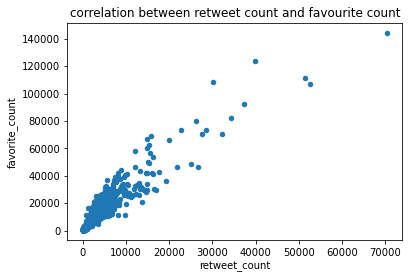

In [690]:
#Plotting to the see the correlation between retweet count and favourite count
import seaborn as sns
df.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter', title = 'correlation between retweet count and favourite count');

This shows a strong correlation between retweet count and favourite count.

#### Insight2: What are most common 10 dogs' names?

In [691]:
dognames_count = df.name.value_counts().nlargest(13)

In [692]:
dognames_count

None       578
Charlie     10
Oliver      10
Cooper      10
Lucy         9
Tucker       9
Penny        9
Winston      8
Sadie        8
Toby         7
Daisy        7
The          7
Lola         7
Name: name, dtype: int64

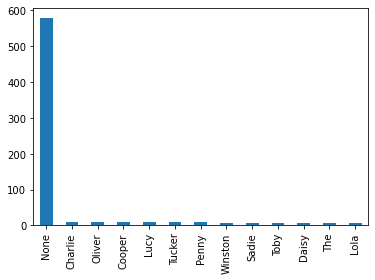

In [693]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.xticks(rotation=90)
dognames_count.plot(kind='bar', figsize = (6, 4))
plt.show()

In [694]:
#We can't clearly see the comparision, because the value of none is quite high and that of 
#the other ranges with a maximum of 10. so lets exclude this value to see clearly
df_name_except_none = df[df['name']!='None'] 

In [695]:
dognames_count = df_name_except_none.name.value_counts().nlargest(10)

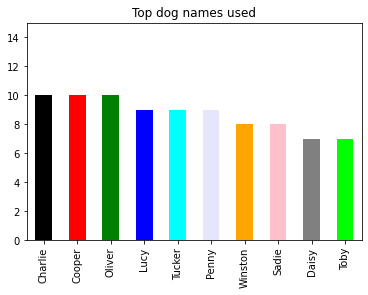

In [696]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.xticks(rotation=90)
plt.ylim(0, 15)
dognames_count.plot(kind='bar', figsize = (6, 4), color=['black', 'red','green', 'blue', 'cyan', 'lavender', 'orange','pink', 'grey', 'lime',], 
title = 'Top dog names used')
plt.show()

We can see that, Tucker, Penny, Cooper, charlier, olivier, lucy, bo, sadie, lola, whiston are the top 10 most used names.

#### Insights4: Distribution for the different sources used to make the tweet

In [697]:
# Do a value count on each source and visualised.
df_source = df.source.value_counts()

In [698]:
df_source

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1924
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [699]:
#We can see it displays only 3 variables, i will used unique to check the unique values in this column
df.source.nunique()

3

In [700]:
labeldistance=1.2

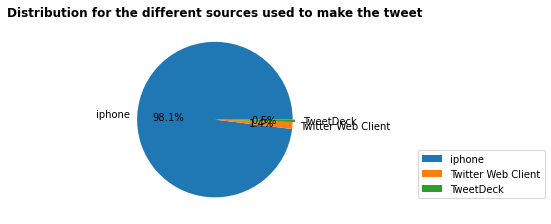

In [701]:
#plotting the pie chart to see th distribuions
title = plt.title('Distribution for the different sources used to make the tweet', fontweight='bold' )
plt.pie(df_source,labels =['iphone', 'Twitter Web Client', 'TweetDeck'], autopct = '%1.1f%%', explode = [0, 0, 0.03] )
plt.figsize = (10,10)
plt.legend( bbox_to_anchor=(1,0.2), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45);

We can see that 93% of the tweets are made from iphone, followed by twitter web client with 1.1% and then tweetdeck with 0.6%

#### Insights4: The most common dog personality

In [702]:
#We will get the value count of each personality found in data frame.
top_personalities = df.personality.value_counts()
top_personalities

pupper            201
doggo              62
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: personality, dtype: int64

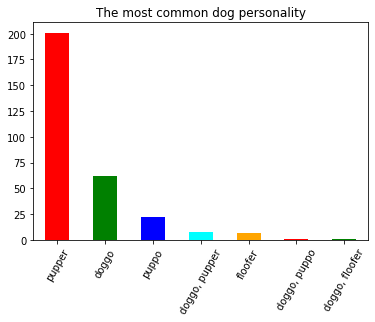

In [703]:
top_personalities.plot(kind='bar', color=['red','green', 'blue', 'cyan', 'orange'], title = 'The most common dog personality')
plt.xticks(rotation=60)
plt.show()

### Visualization

Question: Does numerator ratings affect retweet count

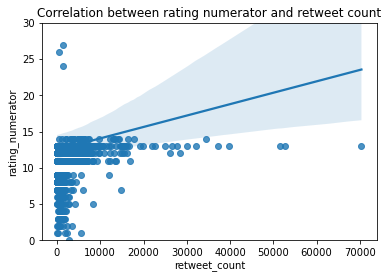

In [704]:
sns.regplot(x = df.retweet_count, y = df.rating_numerator);
plt.title('Correlation between rating numerator and retweet count')
plt.ylim(0, 30);

We can see that there's a weak positive correlation between them